In [152]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
import dill
from copy import deepcopy

In [2]:
with open('menu_transfer.pickle', 'rb') as infile:
    menu = dill.load(infile)

In [120]:
entry = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [4]:
pairs = {0: {'O', 'Z'},
 1: {'H', 'J'},
 2: {'Q', 'W'},
 3: {'G', 'H'},
 4: {'A', 'F'},
 5: {'R', 'T'},
 6: {'A', 'C'},
 7: {'B', 'T'},
 8: {'E', 'T'},
 9: {'A', 'T'},
 10: {'J', 'U'},
 11: {'J', 'T'},
 12: {'A', 'I'},
 13: {'D', 'F'},
 14: {'Q', 'U'},
 15: {'L', 'X'},
 16: {'C', 'D'},
 17: {'A', 'O'},
 18: {'V', 'Y'}}

In [5]:
pairs = {k:list(v) for k,v in pairs.items()}

In [6]:
edges = [(v[0],v[1],{'label':str(k)}) for k,v in pairs.items()]
## ,{'position':str(k)}
# edges

In [18]:
edges

[('O', 'Z', {'label': '0'}),
 ('H', 'J', {'label': '1'}),
 ('W', 'Q', {'label': '2'}),
 ('H', 'G', {'label': '3'}),
 ('A', 'F', {'label': '4'}),
 ('R', 'T', {'label': '5'}),
 ('A', 'C', {'label': '6'}),
 ('B', 'T', {'label': '7'}),
 ('E', 'T', {'label': '8'}),
 ('A', 'T', {'label': '9'}),
 ('J', 'U', {'label': '10'}),
 ('J', 'T', {'label': '11'}),
 ('A', 'I', {'label': '12'}),
 ('F', 'D', {'label': '13'}),
 ('U', 'Q', {'label': '14'}),
 ('L', 'X', {'label': '15'}),
 ('D', 'C', {'label': '16'}),
 ('A', 'O', {'label': '17'}),
 ('Y', 'V', {'label': '18'})]

In [7]:
MG = nx.MultiGraph()

In [8]:
# for p in edges:
#     MG.add_edge(u_for_edge=p[0], v_for_edge=p[1], label=p[2]['label'])

In [9]:
MG.add_edges_from(edges,)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
# MG.edges

In [11]:
# MG.nodes

In [12]:
pos = nx.spring_layout(MG,k=0.4,scale=1)

In [13]:
pos

{'O': array([0.52195073, 0.32380518]),
 'Z': array([0.62792736, 0.50649739]),
 'H': array([-0.54537033,  0.24078484]),
 'J': array([-0.34775782,  0.03910152]),
 'W': array([-0.50667358, -0.66276244]),
 'Q': array([-0.40530371, -0.47963976]),
 'G': array([-0.6208211 ,  0.45477223]),
 'A': array([0.35316203, 0.08943943]),
 'F': array([ 0.30836846, -0.13426719]),
 'R': array([-0.016579  , -0.04786637]),
 'T': array([-0.0119874 ,  0.11125028]),
 'C': array([ 0.48450463, -0.10514969]),
 'B': array([0.00289218, 0.31717149]),
 'E': array([-0.17362951,  0.12995702]),
 'U': array([-0.43381383, -0.23399891]),
 'I': array([0.57492434, 0.11808877]),
 'D': array([ 0.40783551, -0.27024738]),
 'L': array([ 0.21126346, -1.        ]),
 'X': array([ 0.3382888, -0.9551535]),
 'Y': array([-0.43242977,  0.73285829]),
 'V': array([-0.33675146,  0.8253588 ])}

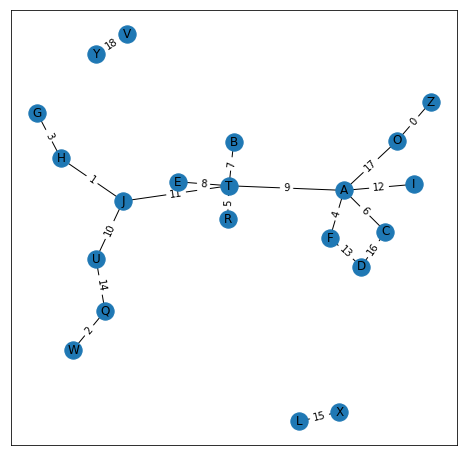

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

nx.draw_networkx(MG,pos=pos)

labels = nx.get_edge_attributes(MG,'label')
labels = {(k[0],k[1]):v for k,v in labels.items()}  ## doesnt' seem to be able to deal with labels for multiples edges
edge_labels = nx.draw_networkx_edge_labels(MG,pos=pos,edge_labels=labels)

In [15]:
# G = nx.Graph()

In [82]:
# G.add_edges_from(edges)

In [12]:
# G.edges

In [13]:
# pos = nx.spring_layout(G) # positions for all nodes

# # nodes
# nx.draw_networkx_nodes(G,pos,node_size=400)

# # labels
# nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

# # edges
# nx.draw_networkx_edges(G,pos,edgelist=edges, width=6)

# # weights
# labels = nx.get_edge_attributes(G,'label')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [16]:
menu

{6: {'in': 'A',
  'out': 'M',
  'menu_link': 'ZZF',
  'conx_in': {10: 'out', 17: 'in', 4: 'out', 9: 'in'},
  'conx_out': {8: 'in'}},
 8: {'in': 'M',
  'out': 'E',
  'menu_link': 'ZZH',
  'conx_in': {6: 'out'},
  'conx_out': {14: 'in', 17: 'out'}},
 14: {'in': 'E',
  'out': 'U',
  'menu_link': 'ZZN',
  'conx_in': {8: 'out', 17: 'out'},
  'conx_out': {10: 'in'}},
 10: {'in': 'U',
  'out': 'A',
  'menu_link': 'ZZJ',
  'conx_in': {14: 'out'},
  'conx_out': {6: 'in', 17: 'in', 4: 'out', 9: 'in'}},
 17: {'in': 'A',
  'out': 'E',
  'menu_link': 'ZZQ',
  'conx_in': {6: 'in', 10: 'out', 4: 'out', 9: 'in'},
  'conx_out': {8: 'out', 14: 'in'}},
 11: {'in': 'T',
  'out': 'I',
  'menu_link': 'ZZK',
  'conx_in': {3: 'in', 13: 'in'},
  'conx_out': {12: 'in'}},
 12: {'in': 'I',
  'out': 'P',
  'menu_link': 'ZZL',
  'conx_in': {11: 'out'},
  'conx_out': {4: 'in'}},
 4: {'in': 'P',
  'out': 'A',
  'menu_link': 'ZZD',
  'conx_in': {12: 'out'},
  'conx_out': {6: 'in', 10: 'out', 17: 'in', 9: 'in'}},
 9: {

In [20]:
edges[:3]

[('O', 'Z', {'label': '0'}),
 ('H', 'J', {'label': '1'}),
 ('W', 'Q', {'label': '2'})]

In [124]:
bombes = [6,10,17]
bchars = ['A','B','C','X','Y','Z']
bminimenu = {b:deepcopy(menu[b]) for b in bombes}
bminimenu

{6: {'in': 'A',
  'out': 'M',
  'menu_link': 'ZZF',
  'conx_in': {10: 'out', 17: 'in', 4: 'out', 9: 'in'},
  'conx_out': {8: 'in'}},
 10: {'in': 'U',
  'out': 'A',
  'menu_link': 'ZZJ',
  'conx_in': {14: 'out'},
  'conx_out': {6: 'in', 17: 'in', 4: 'out', 9: 'in'}},
 17: {'in': 'A',
  'out': 'E',
  'menu_link': 'ZZQ',
  'conx_in': {6: 'in', 10: 'out', 4: 'out', 9: 'in'},
  'conx_out': {8: 'out', 14: 'in'}}}

In [125]:
cminimenu = deepcopy(bminimenu)
for k,v in bminimenu.items():
    for inorout in ['conx_in','conx_out']:
        for n,l in v[inorout].items():

            if n not in bombes:
                del cminimenu[k][inorout][n]
bminimenu = deepcopy(cminimenu)
del cminimenu
bminimenu

{6: {'in': 'A',
  'out': 'M',
  'menu_link': 'ZZF',
  'conx_in': {10: 'out', 17: 'in'},
  'conx_out': {}},
 10: {'in': 'U',
  'out': 'A',
  'menu_link': 'ZZJ',
  'conx_in': {},
  'conx_out': {6: 'in', 17: 'in'}},
 17: {'in': 'A',
  'out': 'E',
  'menu_link': 'ZZQ',
  'conx_in': {6: 'in', 10: 'out'},
  'conx_out': {}}}

In [126]:
iomap = {'in':'I', 'out':'O', 'conx_in':'I', 'conx_out':'O'}

In [196]:
TG = nx.Graph()

In [197]:
for bid in bombes:
    for i in iomap.values():
        for ch in bchars:
            this = f"{bid}-{i}-{ch}"
            TG.add_node(this,)
del this

In [198]:
TG.nodes

NodeView(('6-I-A', '6-I-B', '6-I-C', '6-I-X', '6-I-Y', '6-I-Z', '6-O-A', '6-O-B', '6-O-C', '6-O-X', '6-O-Y', '6-O-Z', '10-I-A', '10-I-B', '10-I-C', '10-I-X', '10-I-Y', '10-I-Z', '10-O-A', '10-O-B', '10-O-C', '10-O-X', '10-O-Y', '10-O-Z', '17-I-A', '17-I-B', '17-I-C', '17-I-X', '17-I-Y', '17-I-Z', '17-O-A', '17-O-B', '17-O-C', '17-O-X', '17-O-Y', '17-O-Z'))

In [213]:
grey = mclr.to_rgba('grey',0.5)
red = mclr.to_rgba('red',0.9)

In [200]:
bedges = set()
for k,v in bminimenu.items():
    for inorout in ['conx_in','conx_out']:
#         ior = iomap[inorout]
        first_node = f"{k}-{iomap[inorout]}-"
        for n,l in v[inorout].items():
            second_node = f"{n}-{iomap[l]}-"
#             print(first_node, " : ",second_node)
            for ch in bchars:
                this_edge = frozenset([first_node+ch,second_node+ch])
#                 print(this_edge)
                bedges.add(this_edge)

bedges

{frozenset({'17-I-Y', '6-I-Y'}),
 frozenset({'10-O-X', '17-I-X'}),
 frozenset({'10-O-B', '17-I-B'}),
 frozenset({'10-O-C', '17-I-C'}),
 frozenset({'17-I-X', '6-I-X'}),
 frozenset({'10-O-Y', '17-I-Y'}),
 frozenset({'17-I-B', '6-I-B'}),
 frozenset({'10-O-Z', '17-I-Z'}),
 frozenset({'10-O-A', '6-I-A'}),
 frozenset({'10-O-Z', '6-I-Z'}),
 frozenset({'10-O-C', '6-I-C'}),
 frozenset({'10-O-Y', '6-I-Y'}),
 frozenset({'10-O-X', '6-I-X'}),
 frozenset({'17-I-C', '6-I-C'}),
 frozenset({'10-O-B', '6-I-B'}),
 frozenset({'10-O-A', '17-I-A'}),
 frozenset({'17-I-A', '6-I-A'}),
 frozenset({'17-I-Z', '6-I-Z'})}

In [201]:
bedges = [list(fs) for fs in bedges]
for b in bedges:
    b.append({'color': grey})
bedges = [tuple(fs) for fs in bedges]
bedges

[('6-I-Y',
  '17-I-Y',
  {'color': (0.5019607843137255,
    0.5019607843137255,
    0.5019607843137255,
    0.5)}),
 ('10-O-X',
  '17-I-X',
  {'color': (0.5019607843137255,
    0.5019607843137255,
    0.5019607843137255,
    0.5)}),
 ('10-O-B',
  '17-I-B',
  {'color': (0.5019607843137255,
    0.5019607843137255,
    0.5019607843137255,
    0.5)}),
 ('17-I-C',
  '10-O-C',
  {'color': (0.5019607843137255,
    0.5019607843137255,
    0.5019607843137255,
    0.5)}),
 ('6-I-X',
  '17-I-X',
  {'color': (0.5019607843137255,
    0.5019607843137255,
    0.5019607843137255,
    0.5)}),
 ('10-O-Y',
  '17-I-Y',
  {'color': (0.5019607843137255,
    0.5019607843137255,
    0.5019607843137255,
    0.5)}),
 ('17-I-B',
  '6-I-B',
  {'color': (0.5019607843137255,
    0.5019607843137255,
    0.5019607843137255,
    0.5)}),
 ('17-I-Z',
  '10-O-Z',
  {'color': (0.5019607843137255,
    0.5019607843137255,
    0.5019607843137255,
    0.5)}),
 ('6-I-A',
  '10-O-A',
  {'color': (0.5019607843137255,
    0.50196

In [202]:
TG.add_edges_from(bedges)

In [203]:
TG.edges

EdgeView([('6-I-A', '10-O-A'), ('6-I-A', '17-I-A'), ('6-I-B', '17-I-B'), ('6-I-B', '10-O-B'), ('6-I-C', '10-O-C'), ('6-I-C', '17-I-C'), ('6-I-X', '17-I-X'), ('6-I-X', '10-O-X'), ('6-I-Y', '17-I-Y'), ('6-I-Y', '10-O-Y'), ('6-I-Z', '10-O-Z'), ('6-I-Z', '17-I-Z'), ('10-O-A', '17-I-A'), ('10-O-B', '17-I-B'), ('10-O-C', '17-I-C'), ('10-O-X', '17-I-X'), ('10-O-Y', '17-I-Y'), ('10-O-Z', '17-I-Z')])

In [204]:
BG = nx.Graph()
BG.add_nodes_from(bombes)
BG.nodes

NodeView((6, 10, 17))

In [205]:
base_pos = nx.circular_layout(BG,scale=0.05)

In [206]:
base_pos

{6: array([5.00000000e-02, 9.93410756e-10]),
 10: array([-0.025     ,  0.04330127]),
 17: array([-0.025     , -0.04330127])}

In [207]:
# %%time
width_of_bombe = 0.02
height_of_bombe = 0.01

wrange_of_letters = list(np.linspace(-0.5*width_of_bombe,0.5*width_of_bombe,26))

manual_pos = {}

for nd in TG.nodes():
    bid,io, ch = nd.split('-')
    bid = int(bid)
    x,y = base_pos[bid]
    
    if io == 'I':
        y += -0.5 * height_of_bombe
    else:
        y += 0.5 * height_of_bombe
        
    x += wrange_of_letters[entry.index(ch)]
    manual_pos[nd] = np.array([x,y])

# manual_pos

In [214]:
TG.edges[('6-I-A', '17-I-A')]['color'] = red

In [215]:
edges = TG.edges()
colors = [TG[u][v]['color'] for u,v in edges]
colors

[(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (1.0, 0.0, 0.0, 0.9),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.5019607843137255, 0.5

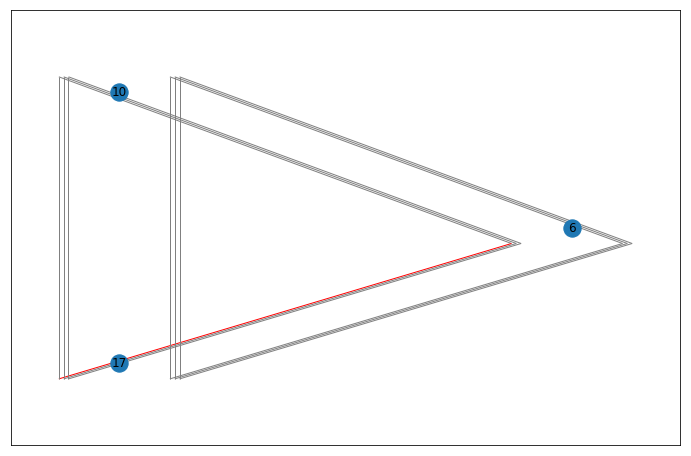

In [216]:
fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx(BG,pos=base_pos)

nx.draw_networkx_edges(TG,pos=manual_pos,edge_color=colors)

# labels = nx.get_edge_attributes(MG,'label')
# labels = {(k[0],k[1]):v for k,v in labels.items()}  ## doesnt' seem to be able to deal with labels for multiples edges
# edge_labels = nx.draw_networkx_edge_labels(MG,pos=pos,edge_labels=labels)
plt.show()

In [144]:
manual_pos

{'6-I-A': array([-0.05, -0.05]),
 '6-I-B': array([-0.042, -0.05 ]),
 '6-I-C': array([-0.034, -0.05 ]),
 '6-I-X': array([ 0.134, -0.05 ]),
 '6-I-Y': array([ 0.142, -0.05 ]),
 '6-I-Z': array([ 0.15, -0.05]),
 '6-O-A': array([-0.05,  0.05]),
 '6-O-B': array([-0.042,  0.05 ]),
 '6-O-C': array([-0.034,  0.05 ]),
 '6-O-X': array([0.134, 0.05 ]),
 '6-O-Y': array([0.142, 0.05 ]),
 '6-O-Z': array([0.15, 0.05]),
 '10-I-A': array([-0.125     , -0.00669873]),
 '10-I-B': array([-0.117     , -0.00669873]),
 '10-I-C': array([-0.109     , -0.00669873]),
 '10-I-X': array([ 0.059     , -0.00669873]),
 '10-I-Y': array([ 0.067     , -0.00669873]),
 '10-I-Z': array([ 0.075     , -0.00669873]),
 '10-O-A': array([-0.125     ,  0.09330127]),
 '10-O-B': array([-0.117     ,  0.09330127]),
 '10-O-C': array([-0.109     ,  0.09330127]),
 '10-O-X': array([0.059     , 0.09330127]),
 '10-O-Y': array([0.067     , 0.09330127]),
 '10-O-Z': array([0.075     , 0.09330127]),
 '17-I-A': array([-0.125     , -0.09330127]),
 '